In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("cargo.csv")

In [31]:
df["date"] = pd.to_datetime(df["date"])

In [32]:
monthly = df.resample("ME", on="date")["score"].sum()

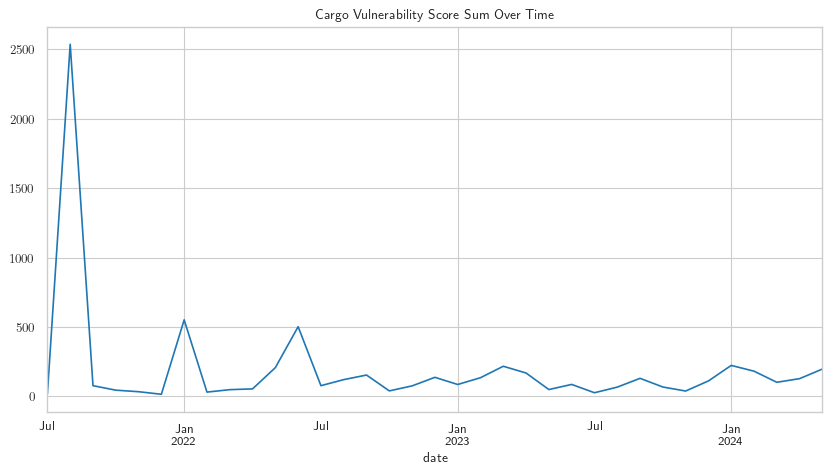

In [33]:
plt.figure(figsize=(10, 5))
monthly.plot(kind="line", x="date", y="score", ax=plt.gca())
plt.title("Cargo Vulnerability Score Sum Over Time")
plt.show()

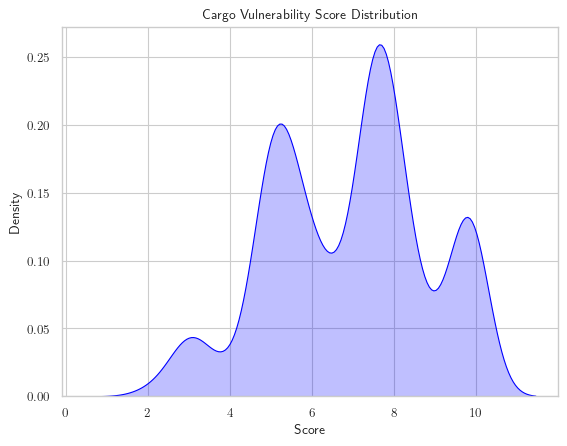

In [34]:
sns.kdeplot(df["score"], fill=True, color="blue")
plt.title("Cargo Vulnerability Score Distribution")
plt.xlabel("Score")
plt.ylabel("Density")
plt.show()

In [35]:
vuln_info_cargo_df = pd.read_csv(
    "../results/vulnerability_metrics_cargo.csv", index_col=0
)
vuln_info_cargo_df["package"] = vuln_info_cargo_df.index
print(vuln_info_cargo_df)

                       reach     downloads  pagerank             package
bronzedb-protocol        6.0  8.412000e+03  0.000013   bronzedb-protocol
neon                    69.0  5.997103e+06  0.000156                neon
shamir                   1.0  3.698000e+04  0.000002              shamir
ammonia                240.0  1.071715e+07  0.000481             ammonia
crossbeam-channel   113473.0  5.353347e+10  0.877049   crossbeam-channel
...                      ...           ...       ...                 ...
rust-i18n-support       16.0  8.255470e+05  0.000032   rust-i18n-support
ferris-says             25.0  3.807660e+05  0.000072         ferris-says
aliyundrive-webdav       1.0  1.701000e+04  0.000002  aliyundrive-webdav
wasmi                  466.0  2.219862e+07  0.000994               wasmi
tls-listener            15.0  8.634370e+05  0.000028        tls-listener

[452 rows x 4 columns]


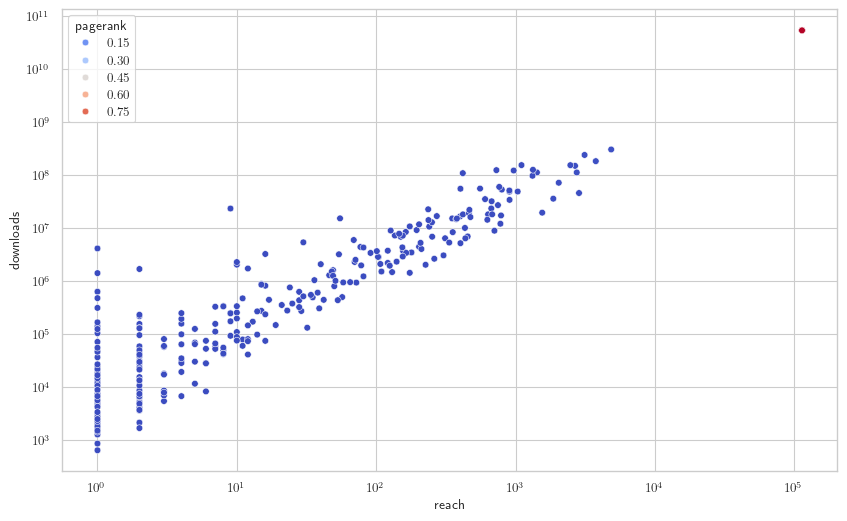

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="reach",
    y="downloads",
    data=vuln_info_cargo_df,
    hue="pagerank",
    palette="coolwarm",
)
plt.yscale("log")
plt.xscale("log")

             index     reach     downloads  pagerank         package
0           xml-rs  113501.0  5.357290e+10  0.877270          xml-rs
1      traitobject  113484.0  5.355507e+10  0.877171     traitobject
2        memoffset  113482.0  5.372604e+10  0.877315       memoffset
3        untrusted  113476.0  5.364259e+10  0.877119       untrusted
4            shlex  113476.0  5.360168e+10  0.877783           shlex
..             ...       ...           ...       ...             ...
95            http  113473.0  5.353347e+10  0.877049            http
96  zeroize_derive  113473.0  5.353347e+10  0.877049  zeroize_derive
97        arc-swap  113473.0  5.353347e+10  0.877049        arc-swap
98    futures-util  113473.0  5.353347e+10  0.877049    futures-util
99        async-h1  113473.0  5.353347e+10  0.877049        async-h1

[100 rows x 5 columns]


<Axes: xlabel='reach', ylabel='downloads'>

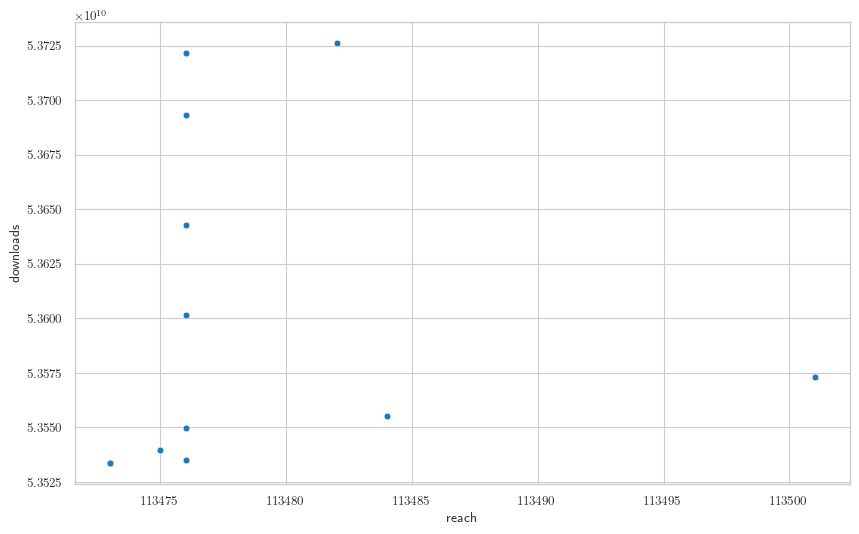

In [37]:
top_100_reach = (
    vuln_info_cargo_df.sort_values("reach", ascending=False).reset_index().head(100)
)
print(top_100_reach)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="reach", y="downloads", data=top_100_reach)

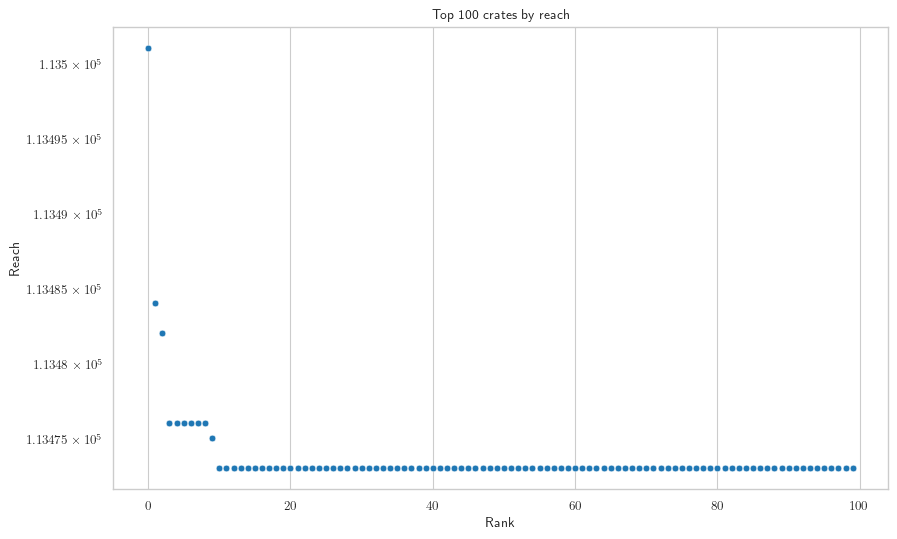

In [38]:
# plot index vs reach
plt.figure(figsize=(10, 6))
sns.scatterplot(x=top_100_reach.index, y="reach", data=top_100_reach)
plt.title("Top 100 crates by reach")
plt.xlabel("Rank")
plt.ylabel("Reach")
plt.yscale("log")

In [39]:
def get_top_n_by_column(df, n=0, column="pagerank"):
    if n == 0:
        n = len(df)
    return df.sort_values(column, ascending=False).reset_index().head(n)

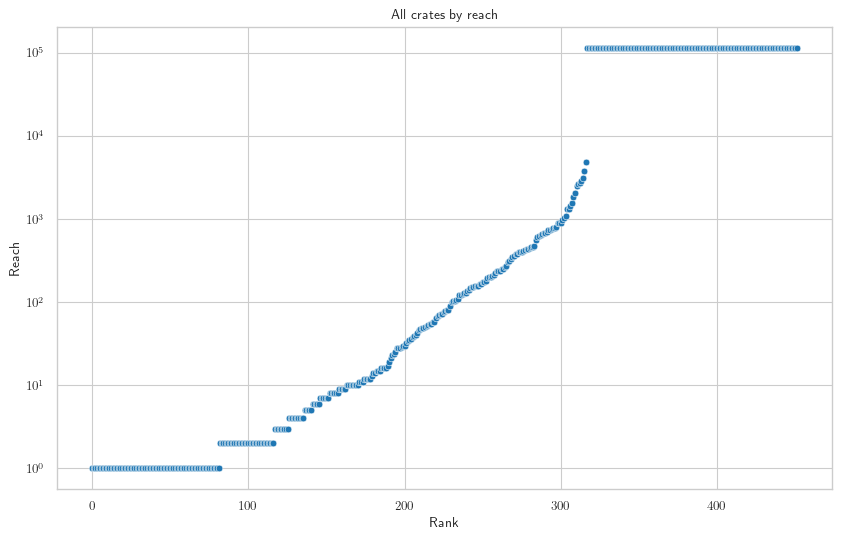

In [40]:
all_by_reach = vuln_info_cargo_df.sort_values("reach", ascending=True).reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=all_by_reach.index, y="reach", data=all_by_reach)
plt.title("All crates by reach")
plt.xlabel("Rank")
plt.ylabel("Reach")
plt.yscale("log")

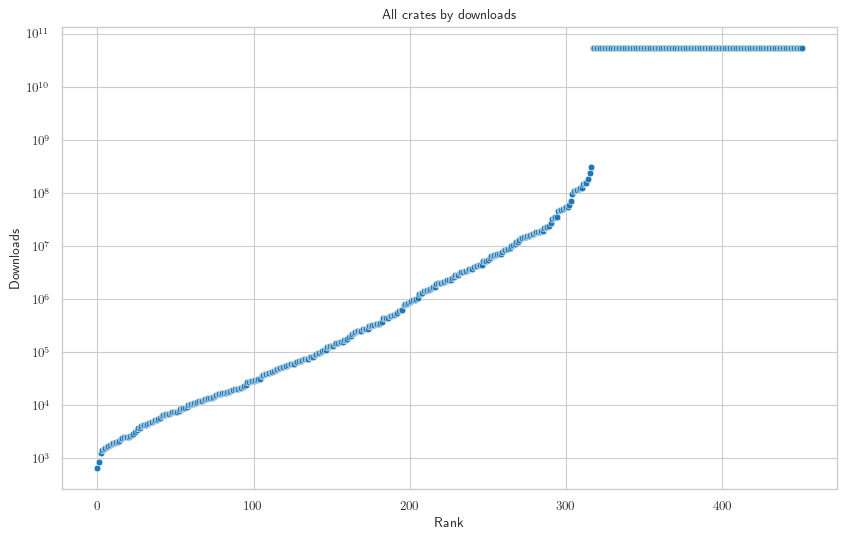

In [41]:
all_by_downloads = vuln_info_cargo_df.sort_values(
    "downloads", ascending=True
).reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=all_by_downloads.index, y="downloads", data=all_by_downloads)
plt.title("All crates by downloads")
plt.xlabel("Rank")
plt.ylabel("Downloads")
plt.yscale("log")

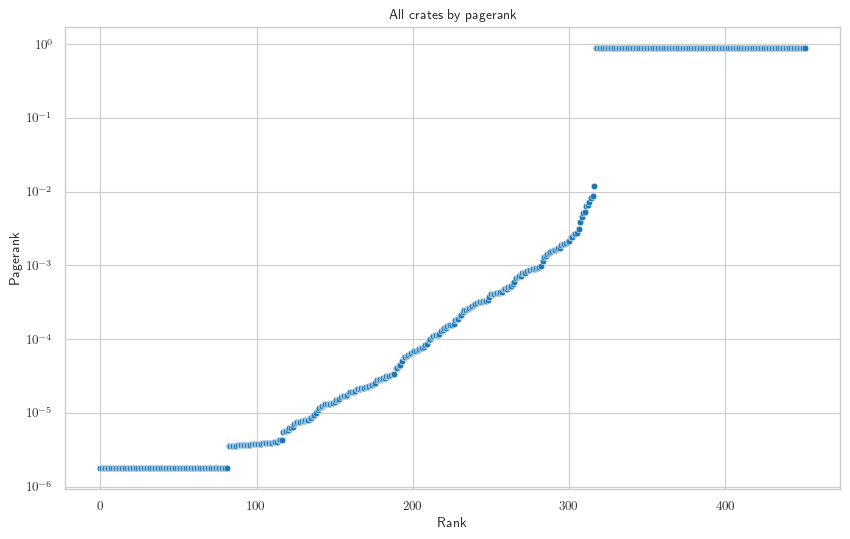

In [42]:
all_by_pagerank = vuln_info_cargo_df.sort_values(
    "pagerank", ascending=True
).reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=all_by_pagerank.index, y="pagerank", data=all_by_pagerank)
plt.title("All crates by pagerank")
plt.xlabel("Rank")
plt.ylabel("Pagerank")
# log scale
plt.yscale("log")

In [43]:
vuln_list_cargo = pd.read_csv("cargo.csv")
vuln_list_npm = pd.read_csv("npm.csv")
vuln_list_pypi = pd.read_csv("pypi.csv")

vuln_list_cargo_grouped = vuln_list_cargo.groupby("package").agg(
    count=("package", "size"), mean_score=("score", "mean"), sum_score=("score", "sum")
)
vuln_list_npm_grouped = vuln_list_npm.groupby("package").agg(
    count=("package", "size"), mean_score=("score", "mean"), sum_score=("score", "sum")
)
vuln_list_pypi_grouped = vuln_list_pypi.groupby("package").agg(
    count=("package", "size"), mean_score=("score", "mean"), sum_score=("score", "sum")
)


df_packages = df.groupby("package")

grouped = (
    df_packages.agg(
        count=("package", "size"),
        mean_score=("score", "mean"),
    )
    .sort_values("count", ascending=False)
    .reset_index()
)

# add reach and downloads
grouped_merged = grouped.merge(
    vuln_info_cargo_df[["package", "reach", "downloads", "pagerank"]],
    on="package",
    how="left",
)


print(grouped_merged.head(20))

              package  count  mean_score     reach     downloads  pagerank
0         openssl-src     32    7.434375  113473.0  5.353347e+10  0.877049
1            wasmtime     28    5.392857    2040.0  7.197789e+07  0.005114
2                 ckb     27    6.770370       1.0  2.440000e+04  0.000002
3            rusqlite     24    8.237500  113473.0  5.353347e+10  0.877049
4           aws-sigv4     23    5.500000     969.0  1.223795e+08  0.001967
5                deno     14    7.600000       4.0  1.591240e+05  0.000009
6            zerocopy     12    4.000000  113473.0  5.353347e+10  0.877049
7               tokio     12    5.416667  113473.0  5.353347e+10  0.877049
8               tauri     11    5.818182     104.0  2.871840e+06  0.000213
9            evm-core     11    5.818182     179.0  3.495782e+06  0.000432
10              hyper     10    5.660000  113473.0  5.353347e+10  0.877049
11  cranelift-codegen     10    6.330000    2670.0  1.497941e+08  0.006522
12                evm    

Text(0, 0.5, 'Count')

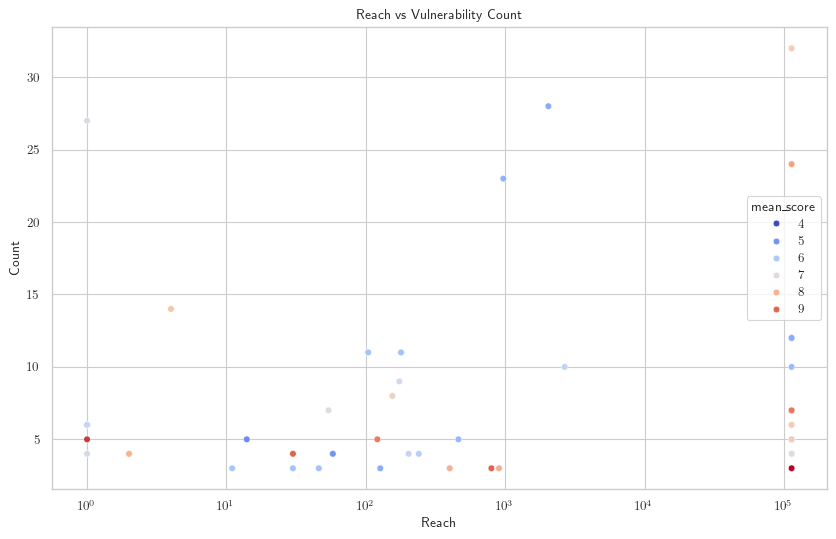

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="reach",
    y="count",
    data=grouped_merged.head(50),
    hue="mean_score",
    palette="coolwarm",
)
# plt.yscale("log")
plt.xscale("log")
plt.title("Reach vs Vulnerability Count")
plt.xlabel("Reach")
plt.ylabel("Count")

In [45]:
import numpy as np

In [46]:
npm_prod_vuln = pd.read_csv(
    "../results/vulnerability_metrics_npm_prod.csv", index_col=0
)
n_results = 0
npm_prod_vuln["package"] = npm_prod_vuln.index
npm_prod_vuln = get_top_n_by_column(npm_prod_vuln, n_results, "pagerank")
npm_prod_vuln["Ecosystem"] = "npm (prod)"
npm_prod_vuln["rank"] = np.arange(len(npm_prod_vuln)) / len(npm_prod_vuln)
npm_prod_vuln = npm_prod_vuln.merge(vuln_list_npm_grouped, on="package", how="left")

pypi_prod_vuln = pd.read_csv("../results/vulnerability_metrics_pypi.csv", index_col=0)
pypi_prod_vuln["package"] = pypi_prod_vuln.index
pypi_prod_vuln = get_top_n_by_column(pypi_prod_vuln, n_results, "pagerank")
pypi_prod_vuln["Ecosystem"] = "PyPI"
pypi_prod_vuln["rank"] = np.arange(len(pypi_prod_vuln)) / len(pypi_prod_vuln)
pypi_prod_vuln = pypi_prod_vuln.merge(vuln_list_pypi_grouped, on="package", how="left")

cargo_vuln = pd.read_csv("../results/vulnerability_metrics_cargo.csv", index_col=0)
cargo_vuln["package"] = cargo_vuln.index
cargo_vuln = get_top_n_by_column(cargo_vuln, n_results, "pagerank")
cargo_vuln["Ecosystem"] = "Crates.io"
cargo_vuln["rank"] = np.arange(len(cargo_vuln)) / len(cargo_vuln)
cargo_vuln = cargo_vuln.merge(vuln_list_cargo_grouped, on="package", how="left")

npm_dev_vuln = pd.read_csv("../results/vulnerability_metrics_npm.csv", index_col=0)
npm_dev_vuln["package"] = npm_dev_vuln.index
npm_dev_vuln = get_top_n_by_column(npm_dev_vuln, n_results, "pagerank")
npm_dev_vuln["Ecosystem"] = "npm"
npm_dev_vuln["rank"] = np.arange(len(npm_dev_vuln)) / len(npm_dev_vuln)
npm_dev_vuln = npm_dev_vuln.merge(vuln_list_npm_grouped, on="package", how="left")


all_vuln = pd.concat([npm_dev_vuln, npm_prod_vuln, pypi_prod_vuln, cargo_vuln])

In [47]:
# matplotlib use latex
plt.rcParams["text.usetex"] = True
sns.set_context("paper")
sns.set_style("whitegrid")

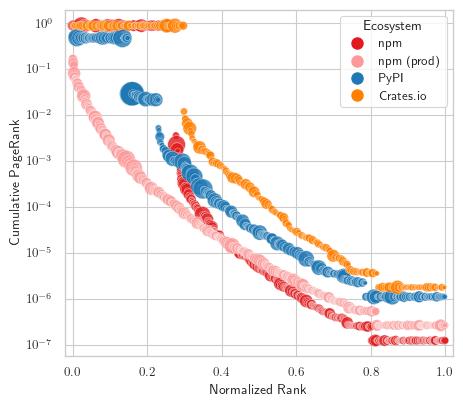

In [77]:
plt.figure(figsize=(5, 4.5))

palette = sns.color_palette("Paired", 10)


colors = {
    "npm": palette[5],
    "npm (prod)": palette[4],
    "PyPI": palette[1],
    "Crates.io": palette[7],
}

size = (np.log(all_vuln["sum_score"]) ** 2,)

scatter = sns.scatterplot(
    x="rank",
    y="pagerank",
    data=all_vuln,
    hue="Ecosystem",
    palette=colors,
    alpha=0.8,
    size=np.log(all_vuln["sum_score"]) ** 2,
    sizes=(0, 300),
    legend=False,
    # marker='|'
)
# plt.title("All vulnerabilities sorted by pagerank")
plt.xlabel("Normalized Rank")
plt.ylabel("Cumulative PageRank")
plt.yscale("log")

# Custom legend
# 1. Add a legend for the 'Ecosystem' hue
handles, labels = scatter.get_legend_handles_labels()
hue_labels = all_vuln["Ecosystem"].unique()
order = ["npm", "npm (prod)", "PyPI", "Crates.io"]
for i, label in enumerate(order):
    handles.append(
        plt.Line2D(
            [0],
            [0],
            marker="o",
            color="w",
            label=label,
            markerfacecolor=colors[label],
            markersize=10,
        )
    )
wiggle = 0.02
plt.xlim(0 - wiggle, 1 + wiggle)

# Combine and display the custom legend
plt.legend(
    handles=handles,
    title="Ecosystem",
    # bbox_to_anchor=(1.05, 1),
    # loc="upper left",
)
# plt.xticks([])
plt.savefig("vuln_pagerank.pdf", bbox_inches="tight")

In [ ]:
duplicates = all_vuln.index[all_vuln.index.duplicated()]
if not duplicates.empty:
    print("Duplicate indexes found:", duplicates)

Duplicate indexes found: Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905],
      dtype='int64', length=3145)


In [ ]:
all_vuln = all_vuln.reset_index(drop=True)